In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os
from scipy.stats import spearmanr, entropy

sns.set_style('white')

In [2]:
SAVE_FIGURES=True
DROP_UNCONVERGED=True

## NN

### Wide

In [3]:
algo = "wide_relu"
dataset = "xor"
# Read
df = pd.read_csv(f'./varying_model_results/{dataset}/{dataset}_{algo}_results_paper.csv')

if DROP_UNCONVERGED:
    df.drop(df[df['train_01_error'] == 0.5].index, inplace=True)

# Define headers
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass
# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df['IRM_L1'] = df['IRM_L1'] / df['n_train_samples']
df['n_regions'] = df['n_regions'] / df['n_train_samples']

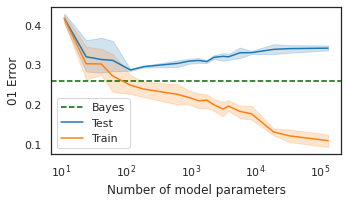

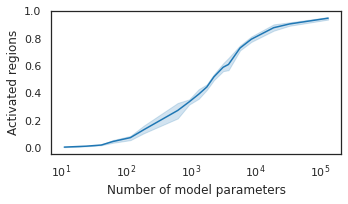

In [4]:
sns.set_context('notebook')

plot_df = df
x_var = 'n_parameters'

for metric, ylab in [('01_error', '01 Error')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    train_error = f'train_{metric}'
    test_error = f'test_{metric}'
    # ax.axvline(2*df['n_train_samples'].iloc[0], ls='--', c='grey')
    ax.axhline(0.26, ls='--', label='Bayes', c='darkgreen')

    sns.lineplot(
        data=df, x=x_var, y=test_error,
        ax=ax, label='Test')
    sns.lineplot(
        data=df, x=x_var, y=train_error,
        ax=ax, label='Train')

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel('Number of model parameters')
    plt.legend()
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()
    
for metric, ylab in [('n_regions', 'Activated regions')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    # ax.axvline(2*df['n_train_samples'].iloc[0], ls='--', c='grey')

    sns.lineplot(
        data=df, x=x_var, y=metric,
        ax=ax)

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel('Number of model parameters')
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()

### Deep

In [5]:
algo = "deep_relu"
dataset = "xor"
# Read
df = pd.read_csv(f'./varying_model_results/{dataset}/{dataset}_{algo}_results_paper.csv')

if DROP_UNCONVERGED:
    df.drop(df[df['train_01_error'] == 0.5].index, inplace=True)

df2 = pd.read_csv(f'./varying_model_results/{dataset}/{dataset}_relu_results.csv')
if DROP_UNCONVERGED:
    df2.drop(df2[df2['train_01_error'] == 0.5].index, inplace=True)
df2 = df2[(df2['width'] < df['width'].max()) & (df2['depth'] == 1)]
df = pd.concat((df, df2))
    
# Define headers
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass
# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df['IRM_L1'] = df['IRM_L1'] / df['n_train_samples']
df['n_regions'] = df['n_regions'] / df['n_train_samples']

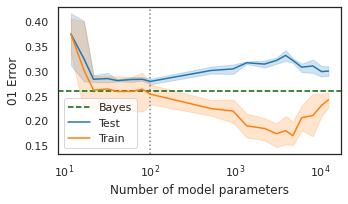

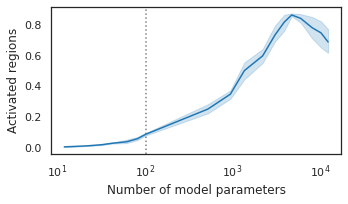

In [6]:
sns.set_context('notebook')

plot_df = df
x_var = 'n_parameters'

for metric, ylab in [('01_error', '01 Error')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    train_error = f'train_{metric}'
    test_error = f'test_{metric}'
    df_groups = df.groupby(['n_parameters']).mean().reset_index()
    reg_point = df_groups.iloc[df_groups[train_error].argmin()]['n_parameters']
    # ax.axvline(2*df['n_train_samples'].iloc[0], ls='--', c='grey')
    ax.axhline(0.26, ls='--', label='Bayes', c='darkgreen')

    depth_point = df.iloc[df[df['depth'] == 1]['width'].argmax()]['n_parameters']
    ax.axvline(depth_point, ls=':', c='grey')

    sns.lineplot(
        data=df, x=x_var, y=test_error,
        ax=ax, label='Test')
    sns.lineplot(
        data=df, x=x_var, y=train_error,
        ax=ax, label='Train')

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel('Number of model parameters')
    plt.legend()
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()


for metric, ylab in [('n_regions', 'Activated regions')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    # ax.axvline(reg_point, ls='--', c='grey', label='Train error minima')
    ax.axvline(depth_point, ls=':', c='grey')

    sns.lineplot(
        data=df, x=x_var, y=metric,
        ax=ax)

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel('Number of model parameters')
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()

In [7]:
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'
df['generalization_gap'] = df[test_error] - df[train_error]

corr_vars = [
    'generalization_gap', # test_error,
    'n_parameters', 'width',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'PEN_IRM_L0', 'PEN_IRM_L1', 'PEN_IRM_L2', 'PEN_n_regions', 'PEN_ACTS_L2',
    # 'IRM_h*', 'ACTS_h*','PEN_IRM_L0,PEN_IRM_L1,PEN_IRM_L2,PEN_n_regions,PEN_ACTS_L2,'
    # 'IRM_entropy', 'IRM_entropy_normalized',
    # 'IRM_rows_mean_L2_min',
    # 'IRM_rows_mean_L2_max',
    # 'IRM_rows_mean_L2',
    # 'IRM_rows_mean_L2_normalized_min',
    # 'IRM_rows_mean_L2_normalized_max',
    # 'IRM_cols_mean_L1', 'IRM_cols_mean_L2',
    'kernel_trace', 'head_norm',
]

corr_df = df[corr_vars].corr('spearman')
display(corr_df['generalization_gap'])

generalization_gap    1.000000
n_parameters          0.515723
width                 0.631372
IRM_L1               -0.069626
IRM_L2               -0.058345
n_regions             0.714828
ACTS_L2              -0.734983
PEN_IRM_L0            0.469548
PEN_IRM_L1           -0.033209
PEN_IRM_L2            0.114217
PEN_n_regions         0.317761
PEN_ACTS_L2           0.002665
kernel_trace          0.510764
head_norm             0.074775
Name: generalization_gap, dtype: float64

## Forest

### Deep

In [8]:
algo = "deep_forest"
dataset = "xor"
# Read
df = pd.read_csv(f'./varying_model_results/{dataset}/{dataset}_{algo}_results_paper.csv')

df.drop(df[df['max_depth'] == 'None'].index, inplace=True)

# Define headers
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

for col in ['max_depth', 'n_total_leaves', 'n_regions']:
    df[col] = df[col].astype(int)

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df['IRM_L1'] = df['IRM_L1'] / df['n_train_samples']
df['n_regions'] = df['n_regions'] / df['n_train_samples']

min_est = df['n_estimators'].min()
df_lookup = df[df['n_estimators'] == min_est].groupby('max_depth').mean()

df['expected_leaves'] = df.apply(
    lambda row: df_lookup.loc[row['max_depth']]['n_total_leaves'] / min_est * row['n_estimators'],
    axis=1
)

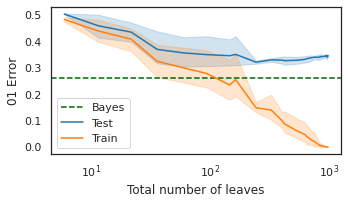

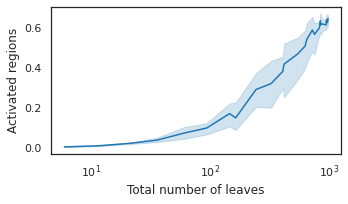

In [9]:
sns.set_context('notebook')

plot_df = df
x_var = 'expected_leaves'
x_label = 'Total number of leaves'

for metric, ylab in [('01_error', '01 Error')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    train_error = f'train_{metric}'
    test_error = f'test_{metric}'
    # ax.axvline(2*df['n_train_samples'].iloc[0], ls='--', c='grey')
    ax.axhline(0.26, ls='--', label='Bayes', c='darkgreen')

    sns.lineplot(
        data=df, x=x_var, y=test_error,
        ax=ax, label='Test')
    sns.lineplot(
        data=df, x=x_var, y=train_error,
        ax=ax, label='Train')

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel(x_label)
    plt.legend()
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()
    
for metric, ylab in [('n_regions', 'Activated regions')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    # ax.axvline(2*df['n_train_samples'].iloc[0], ls='--', c='grey')

    sns.lineplot(
        data=df, x=x_var, y=metric,
        ax=ax)

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel(x_label)
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()

## Shallow

In [10]:
algo = "shallow_forest"
dataset = "xor"
# Read
df = pd.read_csv(f'./varying_model_results/{dataset}/{dataset}_{algo}_results_paper.csv')

df.drop(df[df['max_depth'] == 'None'].index, inplace=True)

# Define headers
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

for col in ['max_depth', 'n_total_leaves', 'n_regions']:
    df[col] = df[col].astype(int)

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df['IRM_L1'] = df['IRM_L1'] / df['n_train_samples']
df['n_regions'] = df['n_regions'] / df['n_train_samples']

min_est = df['n_estimators'].min()
df_lookup = df[df['n_estimators'] == min_est].groupby('max_depth').mean()

df['expected_leaves'] = df.apply(
    lambda row: df_lookup.loc[row['max_depth']]['n_total_leaves'] / min_est * row['n_estimators'],
    axis=1
)

# df_max_leaves = df[df['n_estimators'] == 1]['n_total_leaves'].max()
# df['expected_leaves'] = df.apply(
#     lambda row: row['n_estimators'] * df_max_leaves,
#     axis=1
# )

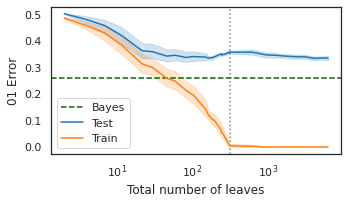

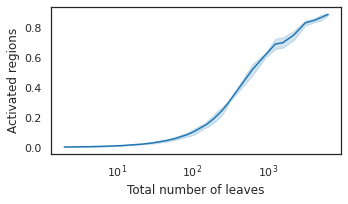

In [11]:
sns.set_context('notebook')

plot_df = df
x_var = 'expected_leaves'
x_label = 'Total number of leaves'

for metric, ylab in [('01_error', '01 Error')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
    train_error = f'train_{metric}'
    test_error = f'test_{metric}'

    reg_point = df[df['n_estimators'] == 1][x_var].max()
    ax.axvline(reg_point, ls=':', c='grey')

    ax.axhline(0.26, ls='--', label='Bayes', c='darkgreen')

    sns.lineplot(
        data=df, x=x_var, y=test_error,
        ax=ax, label='Test')
    sns.lineplot(
        data=df, x=x_var, y=train_error,
        ax=ax, label='Train')

    plt.xscale('log')
    # plt.yscale('log')
    plt.ylabel(ylab)
    plt.xlabel(x_label)
    plt.legend()
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()
    
for metric, ylab in [('n_regions', 'Activated regions')]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)

    sns.lineplot(
        data=df, x=x_var, y=metric,
        ax=ax)

    plt.xscale('log')
    plt.ylabel(ylab)
    plt.xlabel(x_label)
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/{algo}_{dataset}_{metric}_vs_param.pdf')
    plt.show()